Load Data

In [1]:
import pandas as pd
import numpy as np

neg_file = 'C:/Users/ddes2/Desktop/桌面/BML/Assignment_3/EAAC_neg.csv'
pos_file = 'C:/Users/ddes2/Desktop/桌面/BML/Assignment_3/EAAC_pos.csv'

neg_seq = pd.read_csv(neg_file)
pos_seq = pd.read_csv(pos_file)

neg_seq.head()


,Unnamed: 0,#,SW.1.A,SW.1.C,SW.1.D,SW.1.E,SW.1.F,SW.1.G,SW.1.H,SW.1.I,...,SW.27.M,SW.27.N,SW.27.P,SW.27.Q,SW.27.R,SW.27.S,SW.27.T,SW.27.V,SW.27.W,SW.27.Y
0,0,Q2RBM4,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,...,0.2,0.2,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0
1,1,Q2RBM4,0.0,0.0,0.2,0.0,0.0,0.0,0.2,0.0,...,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,Q2RBM4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,Q2RBM4,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,...,0.0,0.0,0.4,0.2,0.0,0.0,0.0,0.0,0.0,0.0
4,4,Q2RBM4,0.0,0.2,0.2,0.0,0.2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# choose proper column to do the scaling
feature_X = neg_seq.iloc[:, 2: ]
label_Y = neg_seq.iloc[:, :2]

feature_X.head(), label_Y.head()

(   SW.1.A  SW.1.C  SW.1.D  SW.1.E  SW.1.F  SW.1.G  SW.1.H  SW.1.I  SW.1.K  \
 0     0.0     0.0     0.0     0.2     0.0     0.0     0.0     0.0     0.2   
 1     0.0     0.0     0.2     0.0     0.0     0.0     0.2     0.0     0.0   
 2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3     0.0     0.0     0.0     0.0     0.2     0.0     0.0     0.0     0.0   
 4     0.0     0.2     0.2     0.0     0.2     0.0     0.0     0.0     0.0   
 
    SW.1.L  ...  SW.27.M  SW.27.N  SW.27.P  SW.27.Q  SW.27.R  SW.27.S  SW.27.T  \
 0     0.0  ...      0.2      0.2      0.0      0.0      0.0      0.0      0.2   
 1     0.2  ...      0.0      0.2      0.0      0.0      0.0      0.0      0.0   
 2     0.2  ...      0.0      0.2      0.0      0.0      0.0      0.0      0.0   
 3     0.2  ...      0.0      0.0      0.4      0.2      0.0      0.0      0.0   
 4     0.0  ...      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
 
    SW.27.V  SW.27.W  SW.27.Y  
 0  

標準化特徵與 PCA 降維

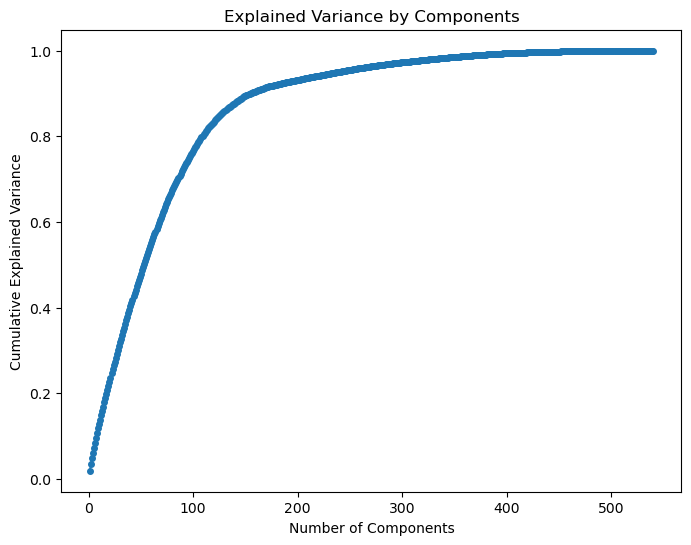

 Number of components to keep to retain 95% of the variance: 239


In [3]:
import matplotlib.pyplot as plt

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(feature_X)

# PCA Application
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Plot 累積解釋變異比率
plt.figure(figsize = (8,6))
plt.plot(
    range(1, len(pca.explained_variance_ratio_) + 1),
    pca.explained_variance_ratio_.cumsum(),
    marker='o',
    linestyle='--',
    linewidth=1,  # thinner line
    markersize=4   # smaller dot
)
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

# Find the number of remaining 95% cumulative explained variance components
n_components = sum(pca.explained_variance_ratio_.cumsum() <= 0.95) + 1
print(f" Number of components to keep to retain 95% of the variance: {n_components}")

In [4]:
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

K-means clustering

Elbow Plot

In [ ]:
# record "inertia"(總內部平方和) each time 

c:\Users\ddes2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ddes2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ddes2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ddes2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ddes2\anaconda3\Lib\site-packages\sklearn\clust

<function matplotlib.pyplot.show(close=None, block=None)>

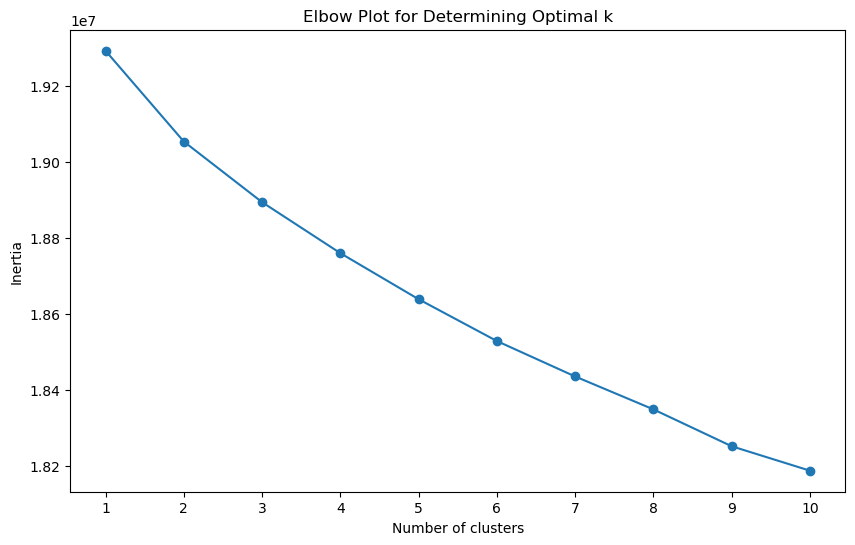

In [5]:
from sklearn.cluster import KMeans

# test different cluster numbers (from 1 to 10)
inertia = []
for n_clusters in range(1,11):
    kmeans = KMeans(n_clusters = n_clusters, random_state = 42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)
    

# plot Elbow Plot 
plt.figure(figsize=(10,6))
plt.plot(range(1,11), inertia, marker = "o", linestyle = "-")
plt.title("Elbow Plot for Determining Optimal k")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.xticks(range(1,11))
plt.show

Silhouette Coefficient (輪廓係數)

c:\Users\ddes2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=2, the average silhouette_score is: 0.007448592686881126


c:\Users\ddes2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=3, the average silhouette_score is: 0.004828992022724249


c:\Users\ddes2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=4, the average silhouette_score is: 0.007262654143055737


c:\Users\ddes2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=5, the average silhouette_score is: 0.004017538165574466


c:\Users\ddes2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=6, the average silhouette_score is: 0.006763359301708213


c:\Users\ddes2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=7, the average silhouette_score is: 0.00639807264307575


c:\Users\ddes2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=8, the average silhouette_score is: 0.006744702475466664


c:\Users\ddes2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=9, the average silhouette_score is: 0.0065587102677917035


c:\Users\ddes2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=10, the average silhouette_score is: 0.005872332854404856


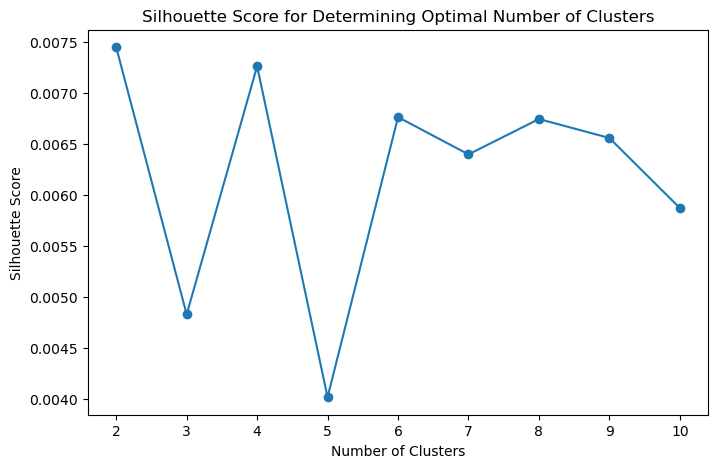

In [16]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

# test different cluster numbers
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_pca)
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters={n_clusters}, the average silhouette_score is: {silhouette_avg}")

# plot
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Score for Determining Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.show()

Hopkins 統計量

In [19]:
from sklearn.neighbors import NearestNeighbors
from random import sample
import numpy as np

def hopkins_statistic(X_pca):
    d = X_pca.shape[1]
    # d random dot for the nearest neighborhood distance 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X_pca)
    rand_X = sample(range(0, len(X_pca), 1), int(len(X_pca) * 0.1))
    ujd = []
    wjd = []
    for j in range(len(rand_X)):
        u_dist, _ = nbrs.kneighbors(np.random.normal(size=(1, d)).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X_pca[rand_X[j]].reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
    
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if np.isnan(H):
        print(ujd, wjd)
        H = 0

    return H

hopkins_stat = hopkins_statistic(X_pca)
print(f"Hopkins Statistic: {hopkins_stat}")


Hopkins Statistic: 0.4805283569372123


In [7]:
kmeans = KMeans(n_clusters=2, random_state=42)
neg_seq['cluster'] = kmeans.fit_predict(X_pca)

# extract the same length with pos_seq data
num_sequences_to_extract = len(pos_seq)

selected_indices = []
for cluster in range(2):
    cluster_indices = neg_seq[neg_seq['cluster'] == cluster].index
    selected_indices.extend(np.random.choice(cluster_indices, num_sequences_to_extract // 2, replace=False))

neg_sampling = neg_seq.loc[selected_indices]
len(neg_sampling)

c:\Users\ddes2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


4960

In [8]:
neg_sampling.head()

,Unnamed: 0,#,SW.1.A,SW.1.C,SW.1.D,SW.1.E,SW.1.F,SW.1.G,SW.1.H,SW.1.I,...,SW.27.N,SW.27.P,SW.27.Q,SW.27.R,SW.27.S,SW.27.T,SW.27.V,SW.27.W,SW.27.Y,cluster
5464,5464,F4K4Y5,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,...,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0
24579,24579,B7F845,0.0,0.2,0.0,0.0,0.0,0.0,0.2,0.2,...,0.0,0.0,0.0,0.0,0.2,0.2,0.0,0.0,0.0,0
16524,16524,A0A0N7KFX7,0.0,0.0,0.0,0.2,0.2,0.0,0.0,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0
30261,30261,A0A5S6R6Q0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,...,0.0,0.2,0.4,0.0,0.0,0.2,0.0,0.0,0.0,0
35746,35746,Q8S1Y5,0.0,0.2,0.0,0.0,0.0,0.0,0.2,0.0,...,0.2,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0


In [19]:
pos_seq.head()

,Unnamed: 0,#,SW.1.A,SW.1.C,SW.1.D,SW.1.E,SW.1.F,SW.1.G,SW.1.H,SW.1.I,...,SW.27.N,SW.27.P,SW.27.Q,SW.27.R,SW.27.S,SW.27.T,SW.27.V,SW.27.W,SW.27.Y,label
0,0,Q2RBM4,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.2,1
1,1,A0A4S4ESM7,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,2,A0A4S4E3R0,0.0,0.2,0.0,0.0,0.0,0.2,0.0,0.0,...,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,1
3,3,B9FBI5,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,...,0.2,0.0,0.0,0.2,0.0,0.0,0.2,0.0,0.0,1
4,4,A0A0P0XUE4,0.2,0.0,0.0,0.0,0.0,0.2,0.0,0.2,...,0.0,0.0,0.0,0.2,0.2,0.0,0.0,0.0,0.0,1


Concatenate two dataset

In [9]:
import pandas as pd
from sklearn.utils import shuffle

neg_data = neg_sampling.drop(neg_sampling.columns[-1], axis=1)

# Make sure of the consistency of the data 
if list(pos_seq.columns) == list(neg_data.columns):
    # Add Labels
    pos_seq['label'] = 1
    neg_data['label'] = 0

    # Concatenate two dataset
    combined_data = pd.concat([pos_seq, neg_data], ignore_index=True)

    # shuffle
    combined_data = shuffle(combined_data, random_state=42)

    # reset_index
    combined_data.reset_index(drop=True, inplace=True)

    # saving combined data
    # combined_data.to_csv('combined_data.csv', index=False)
else:
    print("The columns of the positive and negative data do not match.")


In [10]:
combined_data.head()

,Unnamed: 0,#,SW.1.A,SW.1.C,SW.1.D,SW.1.E,SW.1.F,SW.1.G,SW.1.H,SW.1.I,...,SW.27.N,SW.27.P,SW.27.Q,SW.27.R,SW.27.S,SW.27.T,SW.27.V,SW.27.W,SW.27.Y,label
0,6029,Q0DBF7,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0
1,510,Q5XEP2,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.2,...,0.2,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,1
2,4328,Q0E2X1,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,1
3,34280,Q5VRV7,0.0,0.0,0.0,0.2,0.2,0.0,0.0,0.0,...,0.2,0.0,0.0,0.0,0.2,0.2,0.0,0.0,0.0,0
4,30291,Q0DZ46,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.2,...,0.2,0.0,0.0,0.4,0.0,0.0,0.2,0.0,0.0,0


Data Splitition

In [11]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.optimizers import Adam



X = combined_data.drop(['label', '#', 'Unnamed: 0'], axis=1).values
y = combined_data['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_train = X_train.reshape((-1, 1, X_train.shape[1], 1))
X_test = X_test.reshape((-1, 1, X_test.shape[1], 1))


model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(1,3), activation='relu', input_shape=(1, X_train.shape[2], 1)))
model.add(MaxPooling2D(pool_size=(1,2)))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)


loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")





Epoch 1/10


248/248 [==============================] - 4s 12ms/step - loss: 0.6603 - accuracy: 0.6051 - val_loss: 0.6489 - val_accuracy: 0.6195
Epoch 2/10
248/248 [==============================] - 3s 12ms/step - loss: 0.6240 - accuracy: 0.6517 - val_loss: 0.6334 - val_accuracy: 0.6472
Epoch 3/10
248/248 [==============================] - 3s 13ms/step - loss: 0.6027 - accuracy: 0.6782 - val_loss: 0.6242 - val_accuracy: 0.6552
Epoch 4/10
248/248 [==============================] - 3s 12ms/step - loss: 0.5855 - accuracy: 0.6910 - val_loss: 0.6248 - val_accuracy: 0.6527
Epoch 5/10
248/248 [==============================] - 3s 12ms/step - loss: 0.5720 - accuracy: 0.7027 - val_loss: 0.6325 - val_accuracy: 0.6578
Epoch 6/10
248/248 [==============================] - 3s 12ms/step - loss: 0.5561 - accuracy: 0.7138 - val_loss: 0.6469 - val_accuracy: 0.6578
Epoch 7/10
248/248 [==============================] - 3s 12ms/step - loss: 0.5447 - accuracy: 0.7215 - val_loss: 0.6554 - val_accuracy: 0

加入 Early Stop

In [12]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# 导入数据并分割为训练集和测试集
X = combined_data.drop(['label', '#', 'Unnamed: 0'], axis=1).values
y = combined_data['label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 重塑数据以适应2D CNN
X_train = X_train.reshape((-1, 1, X_train.shape[1], 1))
X_test = X_test.reshape((-1, 1, X_test.shape[1], 1))

# 构建CNN模型
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(1,3), activation='relu', input_shape=(1, X_train.shape[2], 1)))
model.add(MaxPooling2D(pool_size=(1,2)))
model.add(Dropout(0.5))  # 添加Dropout层防止过拟合
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))  # 添加Dropout层防止过拟合
model.add(Dense(1, activation='sigmoid'))

# 编译模型
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 设置早停法和模型检查点
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min')
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, mode='min')

# 训练模型
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10,
                    callbacks=[early_stopping, model_checkpoint])

# 评估模型
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")


Epoch 1/10
248/248 [==============================] - 5s 15ms/step - loss: 0.6795 - accuracy: 0.5638 - val_loss: 0.6654 - val_accuracy: 0.5902
Epoch 2/10
  7/248 [..............................] - ETA: 2s - loss: 0.6597 - accuracy: 0.6116

c:\Users\ddes2\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


248/248 [==============================] - 3s 12ms/step - loss: 0.6468 - accuracy: 0.6305 - val_loss: 0.6571 - val_accuracy: 0.6225
Epoch 3/10
248/248 [==============================] - 3s 11ms/step - loss: 0.6358 - accuracy: 0.6366 - val_loss: 0.6413 - val_accuracy: 0.6386
Epoch 4/10
248/248 [==============================] - 3s 12ms/step - loss: 0.6246 - accuracy: 0.6541 - val_loss: 0.6366 - val_accuracy: 0.6316
Epoch 5/10
248/248 [==============================] - 3s 12ms/step - loss: 0.6167 - accuracy: 0.6632 - val_loss: 0.6372 - val_accuracy: 0.6351
Epoch 6/10
248/248 [==============================] - 3s 12ms/step - loss: 0.6117 - accuracy: 0.6663 - val_loss: 0.6421 - val_accuracy: 0.6305
Epoch 7/10
248/248 [==============================] - 3s 11ms/step - loss: 0.6020 - accuracy: 0.6734 - val_loss: 0.6267 - val_accuracy: 0.6477
Epoch 8/10
248/248 [==============================] - 3s 12ms/step - loss: 0.6005 - accuracy: 0.6774 - val_loss: 0.6327 - val_accuracy: 0.6462
Epoch 9/10

Keras Tuner 進行最佳參調整

In [31]:
import keras_tuner as kt
import tensorflow as tf



def model_builder(hp):
    model = Sequential()
    model.add(Conv2D(filters=hp.Int('filters', min_value=32, max_value=128, step=32),
                     kernel_size=(1, hp.Choice('kernel_size', values=[3, 5])),
                     activation='relu', input_shape=(1, X_train.shape[2], 1)))
    model.add(MaxPooling2D(pool_size=(1,2)))
    model.add(Flatten())
    model.add(Dense(units=hp.Int('units', min_value=50, max_value=200, step=50), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    # For the learning rate, either choose a static value or use hp.Choice to search over
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    
    model.compile(optimizer=Adam(learning_rate=hp_learning_rate),
                  loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

# Replace 'my_dir' with a valid directory path on your system
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='C:/Users/ddes2/Desktop/',  # Specify a valid directory path here
                     project_name='intro_to_kt')


# Early stopping callback
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Execute the search
tuner.search(X_train, y_train, epochs=50, validation_split=0.2, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]


Trial 30 Complete [00h 00m 09s]
val_accuracy: 0.48677581548690796

Best val_accuracy So Far: 0.6876574158668518
Total elapsed time: 00h 04m 50s


In [36]:
# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Print the best hyperparameters
print("Best Hyperparameters:")
print(f"Filters: {best_hps.get('filters')}")
print(f"Kernel Size: {best_hps.get('kernel_size')}")
print(f"Units: {best_hps.get('units')}")
print(f"Learning Rate: {best_hps.get('learning_rate')}")


Best Hyperparameters:
Filters: 96
Kernel Size: 3
Units: 200
Learning Rate: 0.0001


## Best Model - CNN

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

def build_and_save_model(best_filters, best_kernel_size, best_units, best_learning_rate, input_shape, save_path):
    # Construct Model
    model = Sequential()
    model.add(Conv2D(filters=best_filters, kernel_size=(1, best_kernel_size),
                     activation='relu', input_shape=(1, input_shape, 1)))
    model.add(MaxPooling2D(pool_size=(1, 2)))
    model.add(Flatten())
    model.add(Dense(units=best_units, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # Compile Model
    model.compile(optimizer=Adam(learning_rate=best_learning_rate),
                  loss='binary_crossentropy', metrics=['accuracy'])

    # Conserve the Model
    model.save(save_path)

    return model

# Set input_shape according to your setting
input_shape = X_train.shape[2]  

# 指定模型保存路径
save_path = 'C:/Users/ddes2/Desktop/桌面/BML/Assignment_3/CNN_model.h5'  # 请替换为您的实际路径

# 构建并保存模型
model = build_and_save_model(96, 3, 200, 0.0001, input_shape, save_path)

# 打印模型结构
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 1, 538, 96)        384       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 1, 269, 96)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 25824)             0         
                                                                 
 dense_4 (Dense)             (None, 200)               5165000   
                                                                 
 dense_5 (Dense)             (None, 1)                 201       
                                                                 
Total params: 5165585 (19.71 MB)
Trainable params: 5165585 (19.71 MB)
Non-trainable params: 0 (0.00 Byte)
______________

c:\Users\ddes2\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model
import pandas as pd
from sklearn.preprocessing import StandardScaler

model_path = 'C:/Users/ddes2/Desktop/桌面/BML/Assignment_3/CNN_model.h5'  
CNN_model = load_model(model_path)

# Load the new dataset
new_data = pd.read_csv('path_to_your_new_data.csv')

# Preprocess the data as per the original training data's preprocessing
# For example, if you need to scale your features:
scaler = StandardScaler()
new_data_scaled = scaler.fit_transform(new_data)  

# Make Prediction
predictions = CNN_model.predict(new_data_scaled)


# Append predictions to the original DataFrame
new_data_scaled['Predicted_Label'] = predictions

# Save the DataFrame with the predictions to a new CSV
new_data_scaled.to_csv('path_to_your_data_with_predictions.csv', index=False)



Ray Tune

In [41]:
import ray
from ray import tune

def train_cnn(config):
    model = Sequential()
    model.add(Conv2D(filters=config['filters'], kernel_size=(1,3), activation='relu', input_shape=(1, X_train.shape[2], 1)))
    model.add(MaxPooling2D(pool_size=(1,2)))
    model.add(Dropout(0.5))  # 添加Dropout层防止过拟合
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(0.5))  # 添加Dropout层防止过拟合
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(learning_rate=config['lr']), loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

# 定义搜索空间
config = {
    'filters': tune.grid_search([32, 64]),
    'lr': tune.grid_search([0.01, 0.001, 0.0001]),
}

# 启动 Ray Tune
ray.init(object_store_memory=5 * 1024 * 1024 * 1024)  # 限制为5GB
analysis = tune.run(train_cnn, config=config)

# 打印最佳参数
print("Best config: ", analysis.get_best_config(metric="loss", mode="min"))

# 可以访问分析对象以进一步分析结果
dfs = analysis.trial_dataframes


RuntimeError: Maybe you called ray.init twice by accident? This error can be suppressed by passing in 'ignore_reinit_error=True' or by calling 'ray.shutdown()' prior to 'ray.init()'.